In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def parse_datapath(datapath):
    with open(datapath, "r") as f:
        data = json.load(f)
    return parse_data(data)


def parse_data(data):
    tasks_rouge_1 = {}
    tasks_rouge_l = {}
    tasks_em = {}

    tasks_cat_rouge_1 = {}
    tasks_cat_rouge_l = {}
    tasks_cat_em = {}

    for key, value in data.items():
        if "task" in key:
            if "rouge1" in key:
                new_key = "_".join(key.split("_")[3:])
                tasks_rouge_1[new_key] = value
            elif "rougeL" in key:
                new_key = "_".join(key.split("_")[3:])
                tasks_rouge_l[new_key] = value
            elif "exact_match" in key:
                new_key = "_".join(key.split("_")[4:])
                tasks_em[new_key] = value
        elif "for" in key:
            if "rouge1" in key:
                new_key = "_".join(key.split("_")[3:])
                tasks_cat_rouge_1[new_key] = value
            elif "rougeL" in key:
                new_key = "_".join(key.split("_")[3:])
                tasks_cat_rouge_l[new_key] = value
            elif "exact_match" in key:
                new_key = "_".join(key.split("_")[4:])
                tasks_cat_em[new_key] = value

    return (
        data,
        tasks_rouge_l,
        tasks_rouge_1,
        tasks_em,
        tasks_cat_rouge_l,
        tasks_cat_rouge_1,
        tasks_cat_em,
    )

In [3]:
(
    xlingual_mtk_data,
    xlingual_mtk_tasks_rouge_l,
    xlingual_mtk_tasks_rouge_1,
    xlingual_mtk_tasks_em,
    xlingual_mtk_tasks_cat_rouge_l,
    xlingual_mtk_tasks_cat_rouge_1,
    xlingual_mtk_tasks_cat_em,
) = parse_datapath("output/xlingual/mtk-instruct-3b-def-pos/metrics.json")

(
    xlingual_tk_data,
    xlingual_tk_tasks_rouge_l,
    xlingual_tk_tasks_rouge_1,
    xlingual_tk_tasks_em,
    xlingual_tk_tasks_cat_rouge_l,
    xlingual_tk_tasks_cat_rouge_1,
    xlingual_tk_tasks_cat_em,
) = parse_datapath("output/xlingual/tk-instruct-3b-def-pos/metrics.json")

(
    default_mtk_data,
    default_mtk_tasks_rouge_l,
    default_mtk_tasks_rouge_1,
    default_mtk_tasks_em,
    default_mtk_tasks_cat_rouge_l,
    default_mtk_tasks_cat_rouge_1,
    default_mtk_tasks_cat_em,
) = parse_datapath("output/default/mtk-instruct-3b-def-pos/metrics.json")

(
    default_tk_data,
    default_tk_tasks_rouge_l,
    default_tk_tasks_rouge_1,
    default_tk_tasks_em,
    default_tk_tasks_cat_rouge_l,
    default_tk_tasks_cat_rouge_1,
    default_tk_tasks_cat_em,
) = parse_datapath("output/default/tk-instruct-3b-def-pos/metrics.json")

In [4]:
def produce_plot(
    tk_rouge_l,
    tk_rouge_1,
    tk_em,
    mtk_rouge_l,
    mtk_rouge_1,
    mtk_em,
    xlingual=False,
    categories=False,
    fig_height=16,
):
    f, (ax1, ax2, ax3) = plt.subplots(
        1,
        3,
        figsize=(16, fig_height),
        sharey=True,
        constrained_layout=True,
    )

    labels = mtk_rouge_1.keys()
    N = len(labels)
    indices = np.arange(N)
    height = 0.35

    # rouge 1
    ax1.barh(
        indices,
        [mtk_rouge_l[label] for label in labels],
        height,
    )
    ax1.barh(
        indices + height,
        [tk_rouge_l[label] for label in labels],
        height,
    )
    ax1.set_title("ROUGE-L")
    ax1.set_yticks(indices + height / 2, labels)
    ax1.set_ylim([0, N])

    # rouge L
    ax2.barh(
        indices,
        [mtk_rouge_1[label] for label in labels],
        height,
    )
    ax2.barh(
        indices + height,
        [tk_rouge_1[label] for label in labels],
        height,
    )
    ax2.set_title("ROUGE-1")

    # em
    ax3.barh(indices, [mtk_em[label] for label in labels], height, label="mtk-instruct")
    ax3.barh(
        indices + height,
        [tk_em[label] for label in labels],
        height,
        label="tk-instruct",
    )
    ax3.set_title("Exact Match")
    ax3.legend()

    f.suptitle(
        f"Performance on {'English' if xlingual is False else 'X-lingual'}"
        f" {'task categories' if categories else 'tasks'}"
    )
    # f.set_tight_layout(True)
    plt.show()

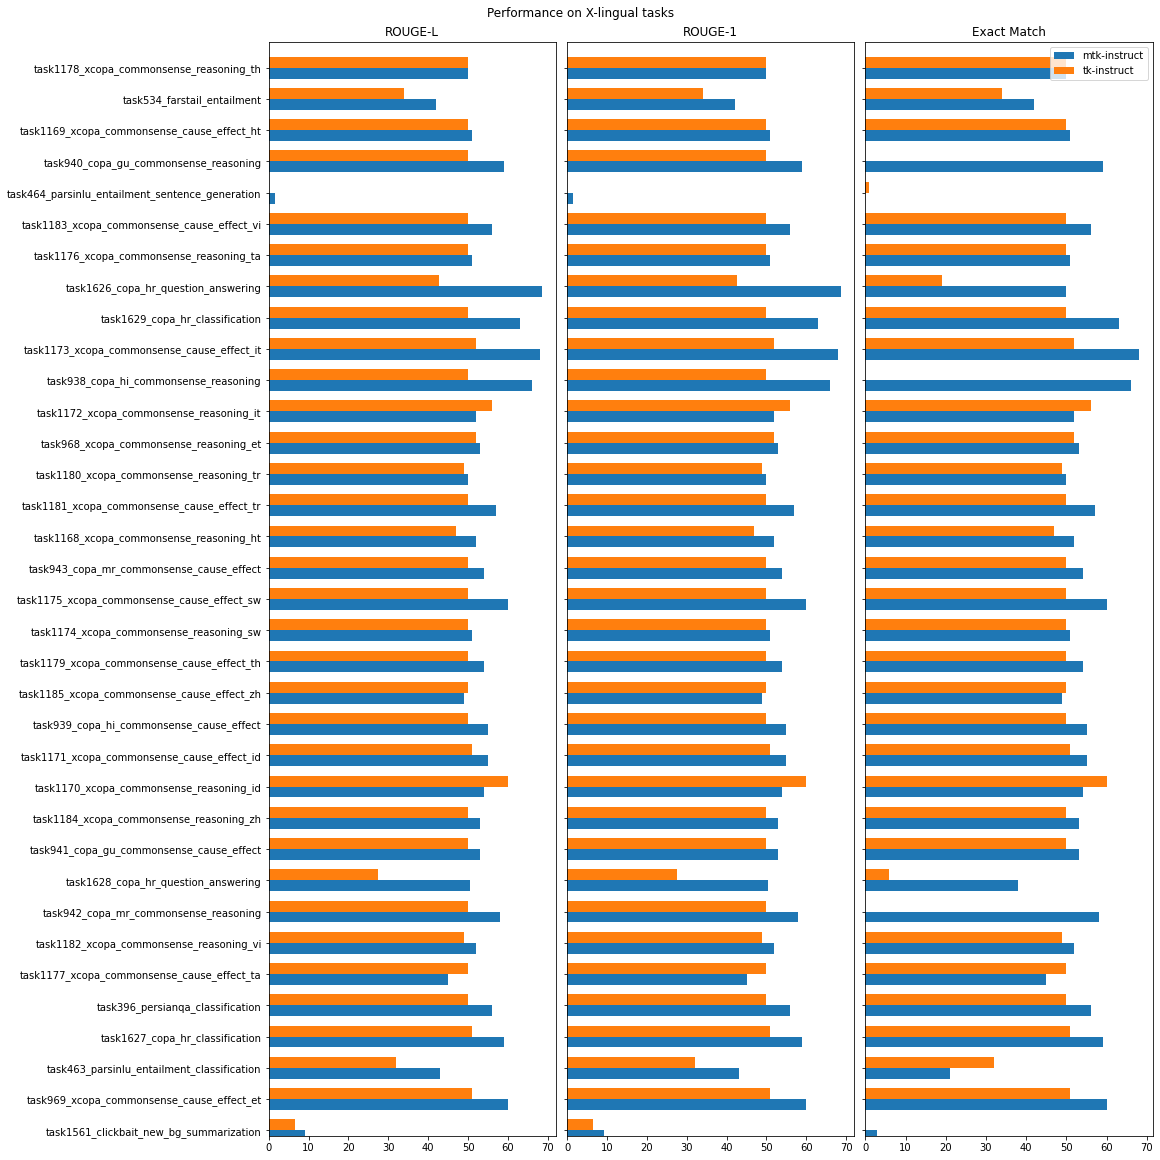

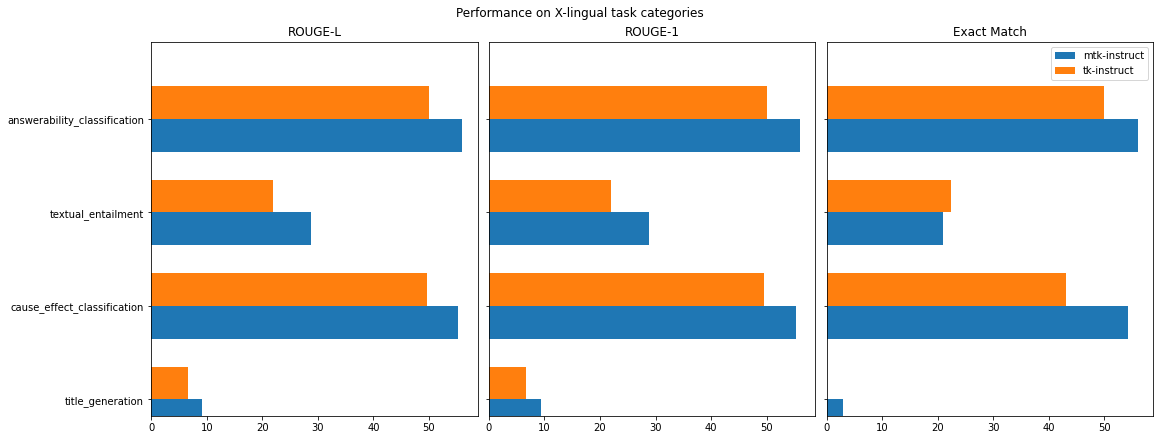

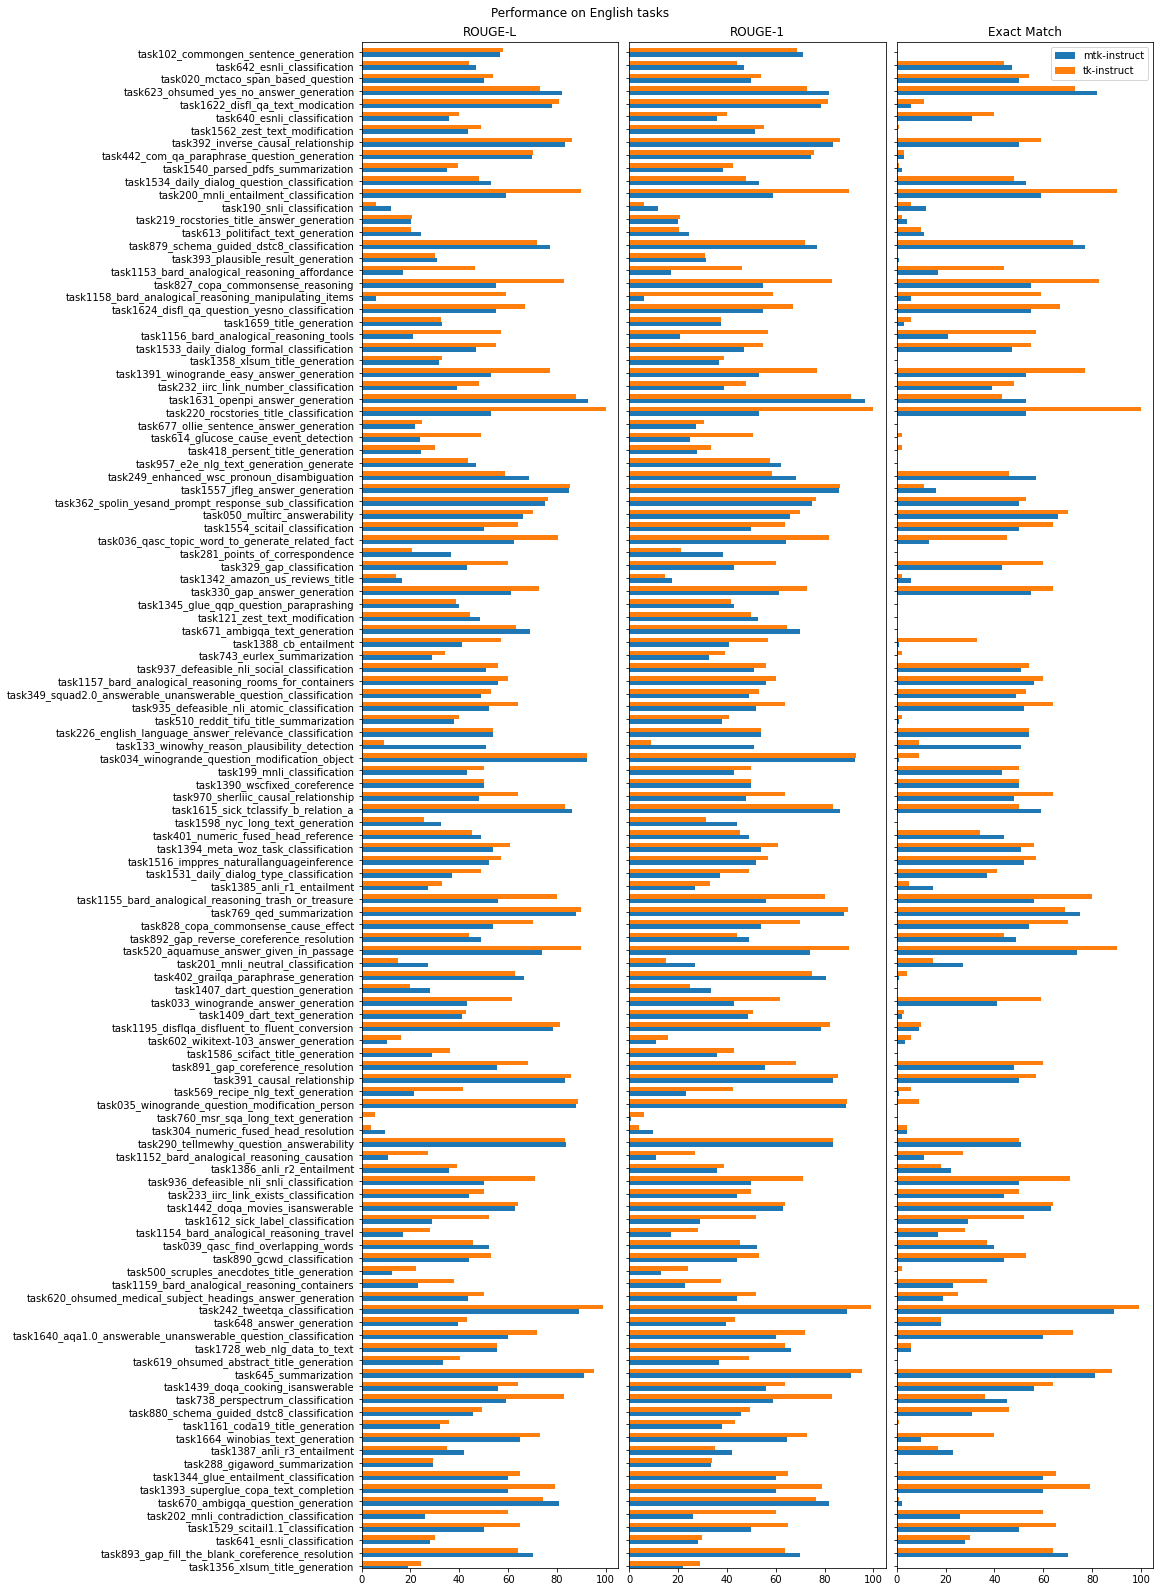

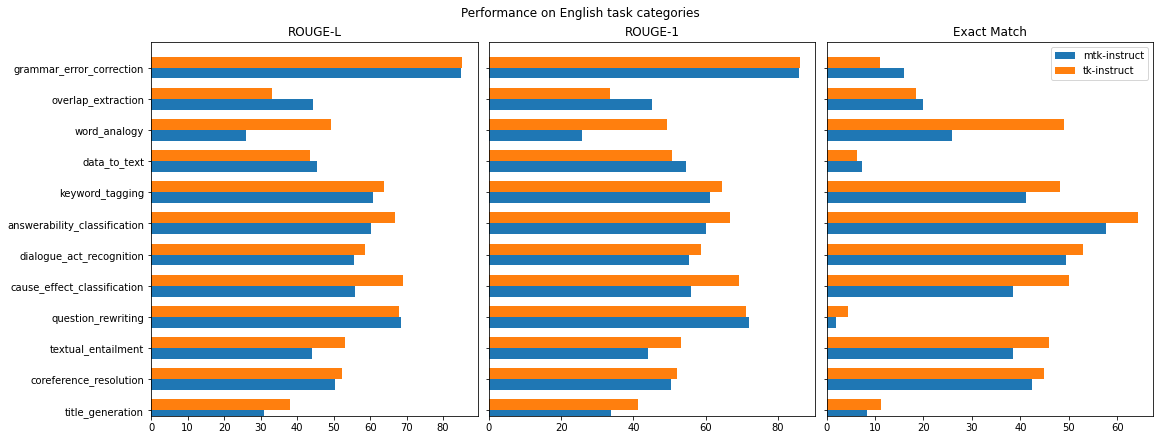

In [5]:
produce_plot(
    xlingual_tk_tasks_rouge_l,
    xlingual_tk_tasks_rouge_1,
    xlingual_tk_tasks_em,
    xlingual_mtk_tasks_rouge_l,
    xlingual_mtk_tasks_rouge_1,
    xlingual_mtk_tasks_em,
    True,
)

produce_plot(
    xlingual_tk_tasks_cat_rouge_l,
    xlingual_tk_tasks_cat_rouge_1,
    xlingual_tk_tasks_cat_em,
    xlingual_mtk_tasks_cat_rouge_l,
    xlingual_mtk_tasks_cat_rouge_1,
    xlingual_mtk_tasks_cat_em,
    True,
    True,
    6
)

produce_plot(
    default_tk_tasks_rouge_l,
    default_tk_tasks_rouge_1,
    default_tk_tasks_em,
    default_mtk_tasks_rouge_l,
    default_mtk_tasks_rouge_1,
    default_mtk_tasks_em,
    False,
    False,
    22
)

produce_plot(
    default_tk_tasks_cat_rouge_l,
    default_tk_tasks_cat_rouge_1,
    default_tk_tasks_cat_em,
    default_mtk_tasks_cat_rouge_l,
    default_mtk_tasks_cat_rouge_1,
    default_mtk_tasks_cat_em,
    False,
    True,
    6
)